### Pell's equation solver
There will be two algorithms: 
* The first is Bhaskara's algorithm, which starts with an arbitrary triple $(a,b,k)$ that satisfies $a^2-db^2=k$ and at each ste updates the triple to get to $k=1$.
* The second is the continued fraction algorithm that finds the fundamental unit of the field $Q(\sqrt{d})$.

In [283]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Bhaskara's method
* This method starts with choosing a triple $(a,b,k)$ satisfying $\gcd(b,k)=1$ and satisfying $a^2-db^2=k$. The triple is otherwise arbitrary.
* Step 1: For our implementation, in Step 1, we will always choose $(a,b,k) = (m,1,m^2-d)$, with $m=\lfloor\sqrt{d}\rfloor+1$.
* Step 2: We choose the $m>0$ satisfying $a + bm \equiv 0\bmod |k|$ and minimizing $|m^2-d|$.
* Step 3: With the choice of $m$ in Step 2 we update the triple:
\begin{align*}
a& = \frac{am+bd}{|k|}\\
b& = \frac{a+bm}{|k|}\\
k& = \frac{m^2-d}{k}.
\end{align*}
Run Step 2 on this new triple.

In [284]:
def step1(d):
    # Initialize the triple (m,1,m^2-d) with m = floor(\sqrt(d)) + 1. 
    
    a = np.floor(np.sqrt(d))+1
    return (a,1,a**2-d)

In [285]:
def step2(a, b, k, d):
    
    m = np.floor(np.sqrt(d))
    
    while ((a + m * b) % np.abs(k)) != 0:    # Find an m satisfying a+bm=0 mod(k). 
        m += 1                               # We choose m close to sqrt(d) so that it is faster to minimize |m^2-d|. 
    

    test = np.abs(m ** 2 - d)                # The next steps adjusts m to minimize |m^2-d| with m>0.
    test_pos = np.abs((m + k) ** 2 - d)      # m runs in arithmetic progressions mod k. 
    test_neg = np.abs((m - k) ** 2 - d)      # Check if m+k or m-k gives a smaller value of |m^2-d|. 
         
    
    if test_pos <= test:                     # If m+k gives a smaller value for |m^2-d| we keep increasing m until |m^2-d| starts growing.
        
        while test_pos <= test:              
            m += k
            test = np.abs(m ** 2 - d)
            test_pos = np.abs((m + k) ** 2 - d)
        m -= k   
    
    if test_neg <= test:                     # If m-k gives a smaller value for |m^2-d| we keep decreasing m until |m^2-d| starts growing.          
    
        while test_neg <= test and m > 0:
            m -= k
            test = np.abs(m ** 2 - d)
            test_neg = np.abs((m - k) ** 2 - d)
        m += k
        
        
    min_m = m                                # This process stops since |m^2-d| is quadratic. Recall also that m>0.
    return min_m
        

In [286]:
def step3(a,b,k,m,d):
    
    a1 = (a * m + b * d) / np.abs(k)         # Update the triple.
    b1 = (a + b * m) / np.abs(k)
    k1 = (m ** 2 - d) / k
    
    return (a1, b1, k1)

In [287]:
def BhaskaraSolve(d):
    
    """
    CAUTION: For certain numbers (like d=181 and 1031) the algorithm takes a very long time to converge (and possibly does not converge). 
             This is presumably is because of the ad hoc optimization we did in Step 2, and should be further studied.
             It probably is also related to the length of the continued fraction expansion of \sqrt{d} for these values of d 
             (see the continued fraction algorithm below).
    """
    
    (a, b, k) = step1(d)
    k_list = [k]                           # We keep the list of k's in the iteration to see how they vary.
    
    while k != 1:

        m = step2(a, b, k, d)
        (a, b, k) = step3(a, b, k, m, d)
        k_list.append(k)
                
        
    return(a,b, k_list)

In [288]:
def k_plot(d):
    
    """
    This plots the values of the k's in the iteration.
    There is probably quite a nice structure to these k's. 
    They probably depend on the continued fraction expansion of \sqrt{d}.
    """
    
    ks = solve(d)[2]
    xRange = np.arange(len(ks))
    plt.plot(xRange, ks)
    plt.title('d=%d' % d)
    plt.ylabel('k-value')
    plt.xlabel('Iteration')
    plt.axhline(1)

In [289]:
first500primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223, 1229, 1231, 1237, 1249, 1259, 1277, 1279, 1283, 1289, 1291, 1297, 1301, 1303, 1307, 1319, 1321, 1327, 1361, 1367, 1373, 1381, 1399, 1409, 1423, 1427, 1429, 1433, 1439, 1447, 1451, 1453, 1459, 1471, 1481, 1483, 1487, 1489, 1493, 1499, 1511, 1523, 1531, 1543, 1549, 1553, 1559, 1567, 1571, 1579, 1583, 1597, 1601, 1607, 1609, 1613, 1619, 1621, 1627, 1637, 1657, 1663, 1667, 1669, 1693, 1697, 1699, 1709, 1721, 1723, 1733, 1741, 1747, 1753, 1759, 1777, 1783, 1787, 1789, 1801, 1811, 1823, 1831, 1847, 1861, 1867, 1871, 1873, 1877, 1879, 1889, 1901, 1907, 1913, 1931, 1933, 1949, 1951, 1973, 1979, 1987, 1993, 1997, 1999, 2003, 2011, 2017, 2027, 2029, 2039, 2053, 2063, 2069, 2081, 2083, 2087, 2089, 2099, 2111, 2113, 2129, 2131, 2137, 2141, 2143, 2153, 2161, 2179, 2203, 2207, 2213, 2221, 2237, 2239, 2243, 2251, 2267, 2269, 2273, 2281, 2287, 2293, 2297, 2309, 2311, 2333, 2339, 2341, 2347, 2351, 2357, 2371, 2377, 2381, 2383, 2389, 2393, 2399, 2411, 2417, 2423, 2437, 2441, 2447, 2459, 2467, 2473, 2477, 2503, 2521, 2531, 2539, 2543, 2549, 2551, 2557, 2579, 2591, 2593, 2609, 2617, 2621, 2633, 2647, 2657, 2659, 2663, 2671, 2677, 2683, 2687, 2689, 2693, 2699, 2707, 2711, 2713, 2719, 2729, 2731, 2741, 2749, 2753, 2767, 2777, 2789, 2791, 2797, 2801, 2803, 2819, 2833, 2837, 2843, 2851, 2857, 2861, 2879, 2887, 2897, 2903, 2909, 2917, 2927, 2939, 2953, 2957, 2963, 2969, 2971, 2999, 3001, 3011, 3019, 3023, 3037, 3041, 3049, 3061, 3067, 3079, 3083, 3089, 3109, 3119, 3121, 3137, 3163, 3167, 3169, 3181, 3187, 3191, 3203, 3209, 3217, 3221, 3229, 3251, 3253, 3257, 3259, 3271, 3299, 3301, 3307, 3313, 3319, 3323, 3329, 3331, 3343, 3347, 3359, 3361, 3371, 3373, 3389, 3391, 3407, 3413, 3433, 3449, 3457, 3461, 3463, 3467, 3469, 3491, 3499, 3511, 3517, 3527, 3529, 3533, 3539, 3541, 3547, 3557, 3559, 3571]

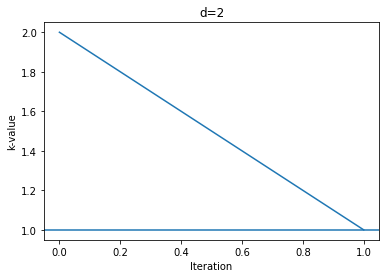

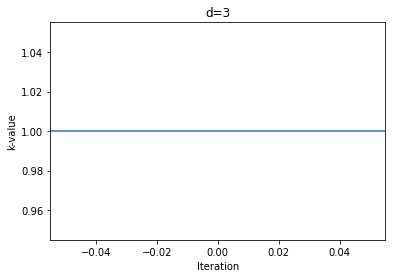

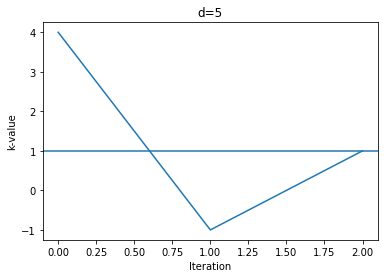

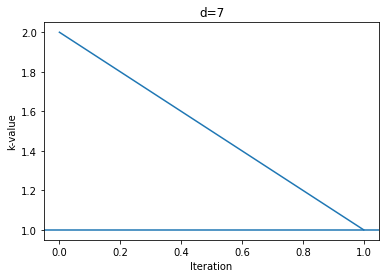

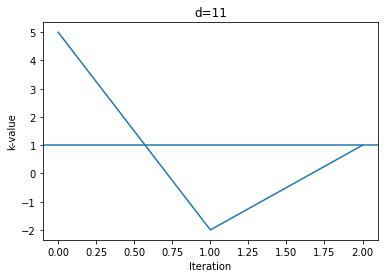

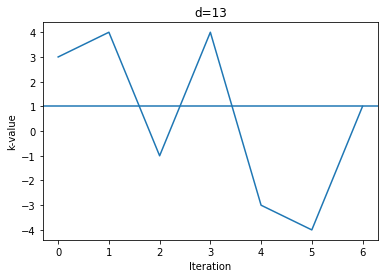

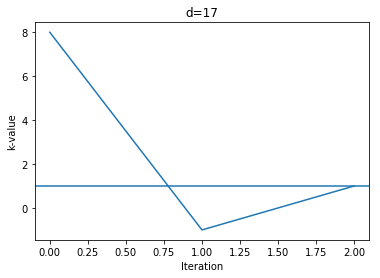

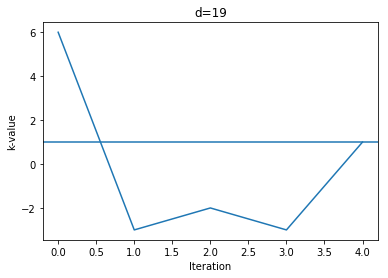

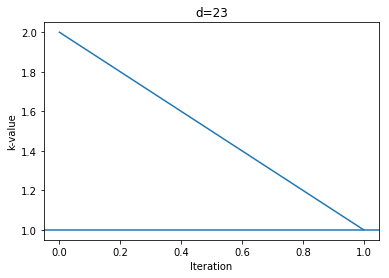

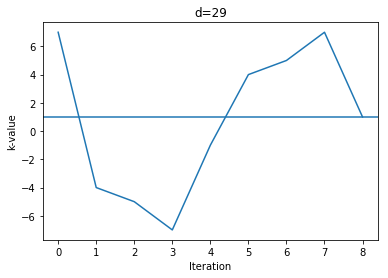

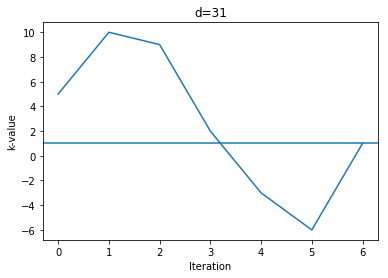

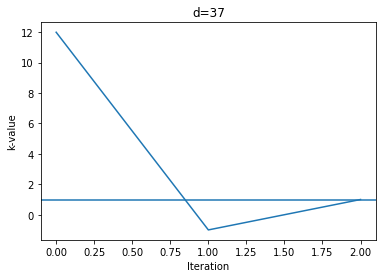

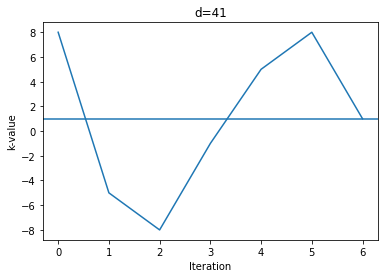

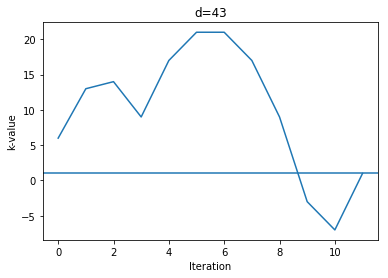

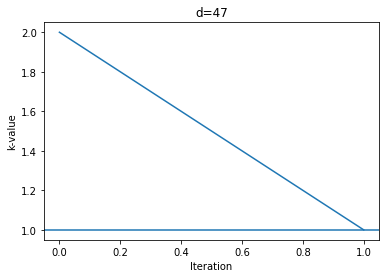

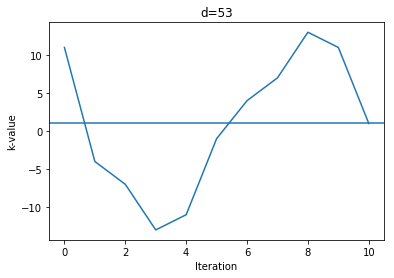

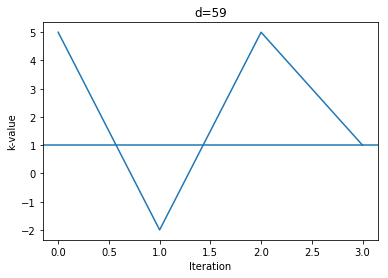

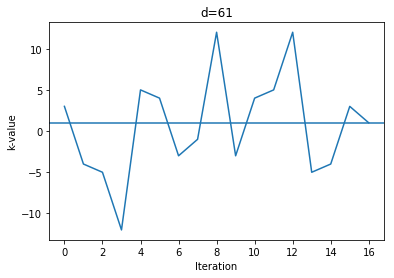

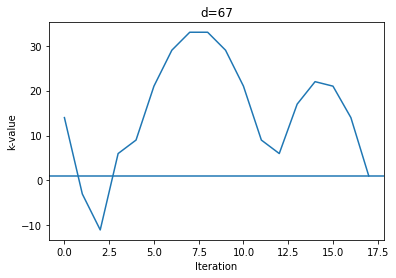

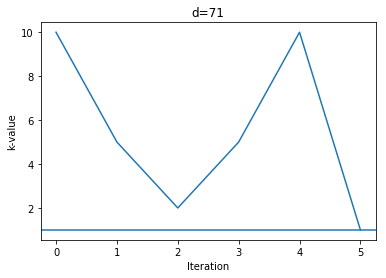

In [290]:
for i in first500primes[:20]:
    plt.figure()
    k_plot(i)

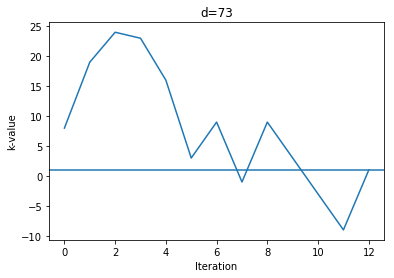

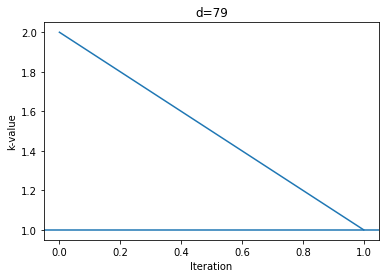

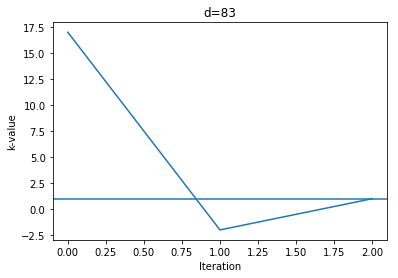

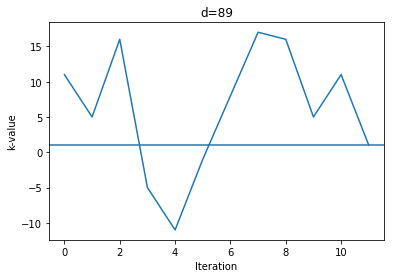

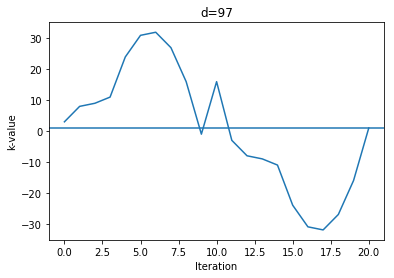

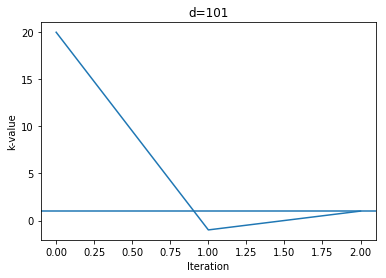

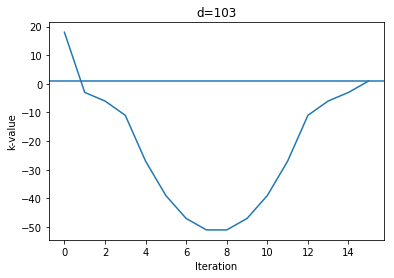

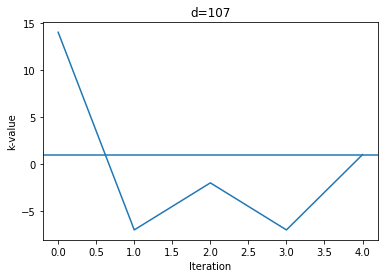

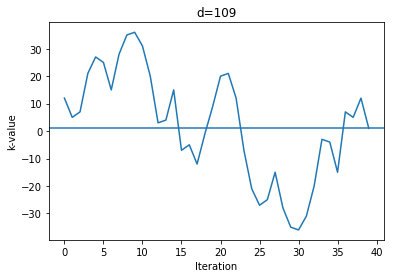

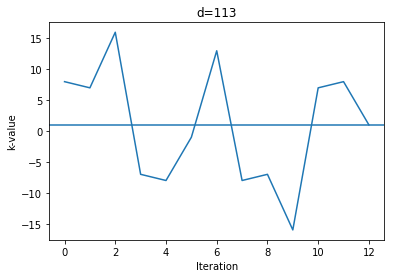

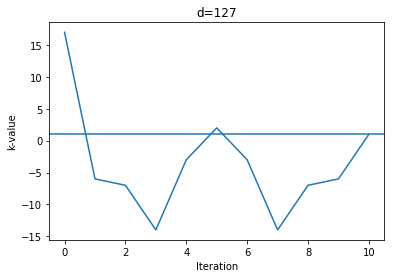

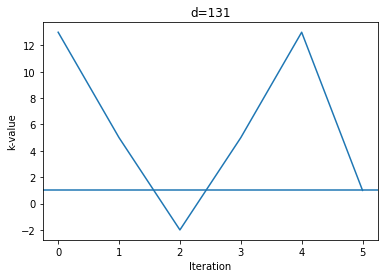

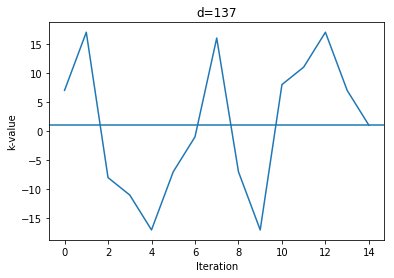

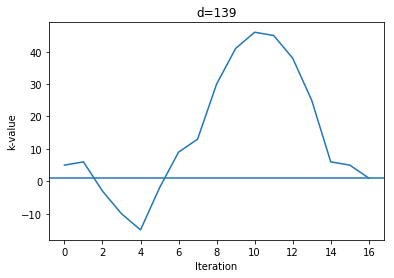

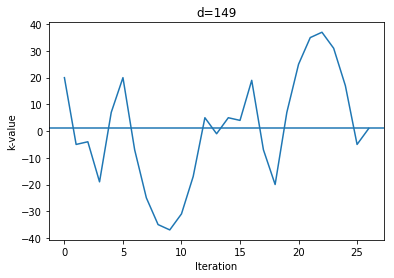

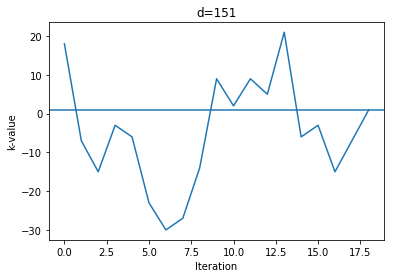

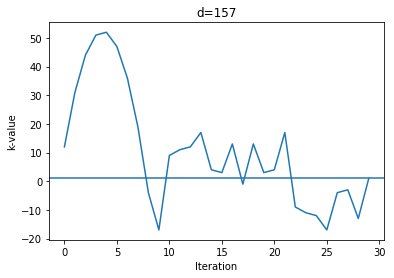

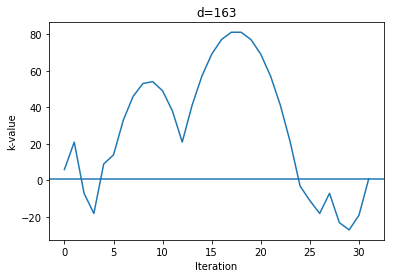

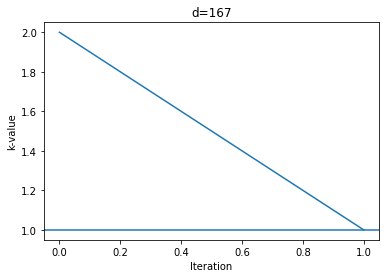

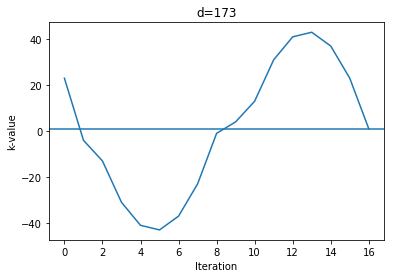

In [291]:
for i in first500primes[20:40]:
    plt.figure()
    k_plot(i)

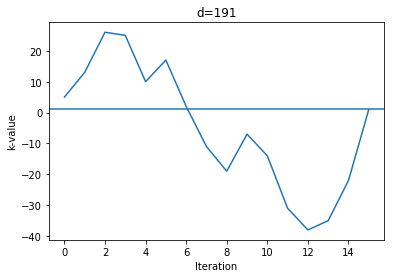

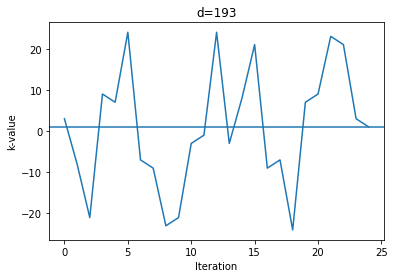

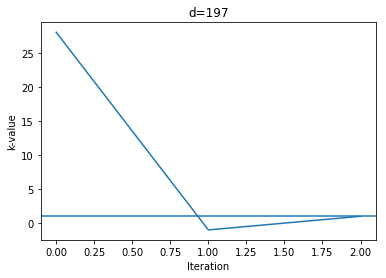

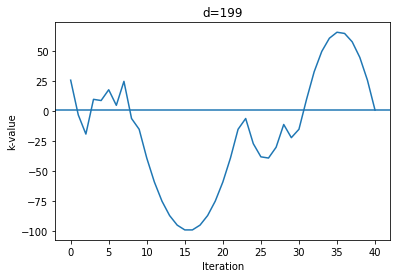

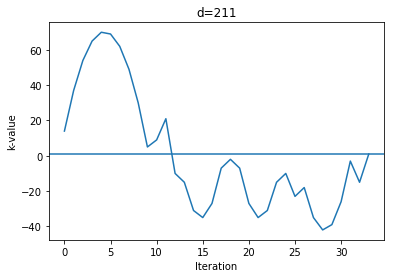

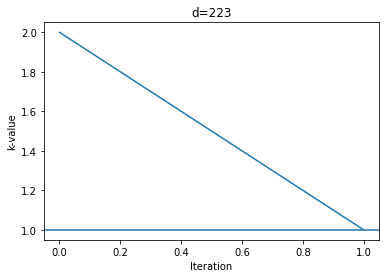

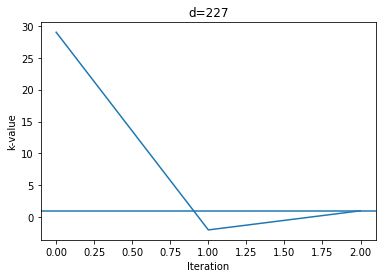

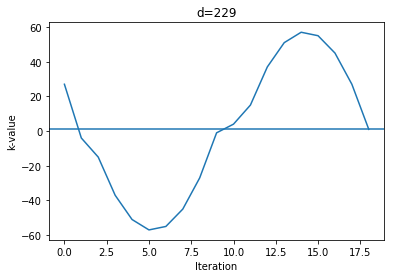

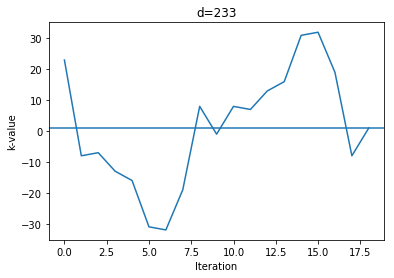

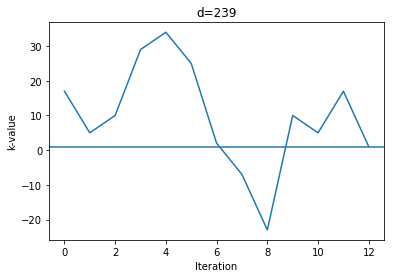

In [292]:
for i in first500primes[42:52]:
    plt.figure()
    k_plot(i)

### Continued fractions
This is pretty simple. The two relevant points are:

* The continued fraction expansion of $\sqrt(d)$ is periodic. 
* If $a_0=\lfloor\sqrt{d}\rfloor$ then the continued fraction expansion is $[a_0,\overline{a_1,\cdots,a_n}]$ with $a_n=2a_0$ and $a_j<2a_0$ for every $1\leq j \leq n-1$.
* If $\frac{p_k}{q_k}$ denotes the $k$'th convergent (i.e. cut the part of the continued fraction after $k$, so the $0$'th convergent is $a_0$, first is $a_0+\frac{1}{a_1}$ etc.) then the solution to Pell's equation is either $(p_{n-1}, q_{n-1})$ or $(p_{n-1}^2+dq_{n-1}^2, 2p_{n-1}q_{n-1})$. 
* In general, $(p_{n-1}, q_{n-1})$ gives the fundamental unit in the ring $\mathbb{Q}(\sqrt{d})$, which may have norm $-1$ (this happens only if $d\equiv 1\bmod 4$). In that case we would like to square of the fundamental unit to solve $x^2-dy^2=1$, this is why we are getting the second solution above.


In [293]:
def cont(d):
    
    """
    Calculates the continued fraction expansion of \sqrt{d}.
    The expansion is periodic with period ending when one gets a_n=2a_0.
    Returns a list of integers.
    """
    
    sqrtd = np.sqrt(d)
    
    dlist = []
    
    a = np.floor(sqrtd)
    b = 1 / (sqrtd - a) 
    
    
    dlist.append(a)
    i = np.floor(b)
    dlist.append(i)
    
    while i != 2 * a:
        
        b = 1 / (b - i)
        i = np.floor(b)
        dlist.append(i)
        
    return(dlist)
        
        
        
        

In [294]:
def contFracSolve(d):
    
    """
    Recursively calculates the convergents. 
    Stops at the numerator and denominator of the n-1'st convergent and checks if that satisfies p_{n-1}^2-d1_{n-1}^2=1 0r -1.
    If it satisfies the equation with 1, then returns (p_{n-1}, q_{n-1}), otherwise returns (p_{n-1}^2+q_{n-1}^2,2p_{n-1}q_{n-1}).
    
    CAUTION: When the period of the continued fraction is long the algorithm overflows. 
             We have a separate case check for that at the end.
            (Exactly how long should be checked, but over a 100 seem to cause problems.)
    """
    
    
    u = np.array([1, 0])
    v = np.array([0, 1])
    
    contdFrac_d = cont(d)
    l = len(contdFrac_d)

    
    for i in range(l-1):
        
        w = contdFrac_d[i] * u + v
        v = u
        u = w
    
        
    if u[0] ** 2 - d * u[1] ** 2 == 1:
        return u
    elif u[0] ** 2 - d * u[1] ** 2 == -1:    # This happens only if the fundamental unit has norm -1.
        return (u[0] ** 2 + d * u[1] ** 2, 2* u[0] * u[1], 'Fundamental unit is -1.')
    else:        # When the period of the continued fraction is long the function overflows. 
        return ('Length of the continuted fraction is %d.' % l)

    

In [295]:
for i in first500primes[:100]:
    print(contFracSolve(i))

(3.0, 2.0, 'Fundamental unit is -1.')
[ 2.  1.]
(9.0, 4.0, 'Fundamental unit is -1.')
[ 8.  3.]
[ 10.   3.]
(649.0, 180.0, 'Fundamental unit is -1.')
(33.0, 8.0, 'Fundamental unit is -1.')
[ 170.   39.]
[ 24.   5.]
(9801.0, 1820.0, 'Fundamental unit is -1.')
[ 1520.   273.]
(73.0, 12.0, 'Fundamental unit is -1.')
(2049.0, 320.0, 'Fundamental unit is -1.')
[ 3482.   531.]
[ 48.   7.]
(66249.0, 9100.0, 'Fundamental unit is -1.')
[ 530.   69.]
(1766319049.0, 226153980.0, 'Fundamental unit is -1.')
[ 48842.   5967.]
[ 3480.   413.]
(2281249.0, 267000.0, 'Fundamental unit is -1.')
[ 80.   9.]
[ 82.   9.]
(500001.0, 53000.0, 'Fundamental unit is -1.')
(62809633.0, 6377352.0, 'Fundamental unit is -1.')
(201.0, 20.0, 'Fundamental unit is -1.')
[ 227528.   22419.]
[ 962.   93.]
(158070671986249.0, 15140424455100.0, 'Fundamental unit is -1.')
(1204353.0, 113296.0, 'Fundamental unit is -1.')
[ 4730624.   419775.]
[ 10610.    927.]
(6083073.0, 519712.0, 'Fundamental unit is -1.')
Length of the con

/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in double_scalars
/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
/Users/Altug/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in add
